# SIT788 Task 3.2
### Samantha Petri
### 221464626
#### [Aim for HD Grade]

#### Question 1:

The selected dataset is called "Personal Key Indicators of Heart Disease". It is based off a survey of 400,000 adults conducted by the Center for Disease Control and Prevention in 2020. The original data was then cleaned by selecting the most relevant variables, reducing the number of variables from 300 to 18.


Heart disease is one of the leading causes of death, with many people having at least 1 of 3 key risk factors (Pytlak 2022). It is therefore very important to be able to detect and prevent the factors that have the greatest impact on heart disease. By applying machine learning methods, 'patterns' from the data can be identified, allowing a patient's condition to be predicited (Pytlak 2022).

The output (class labels) for the dataset were binary, being categorized as either true or false for having heart disease. More specifically, true indicated having coronary heart disease or myocardial infarction and false indicated having neither.

The variables included in the dataset contained 9 boolean, 5 string and 4 decimal types. These variables were:

Heart disease (boolean)

BMI (decimal)

Smoking (boolean)

Alcohol drinking (boolean)

Stroke (boolean)

Physical health (decimal)

Mental health (decimal)

Difficulty walking? (boolean)

Sex (string)

Age category (string)

Race (string)

Diabetic (string)

Physical activity (boolean)

General health (string)

Sleep time (decimal)

Asthma (boolean)

Kidney disease (boolean)

Skin cancer (boolean)

The problem that needs to be solved by using the machine learning models of Decision Tree (DT) and Random Forest (RF) for this dataset is: which features have a significant effect on the likelihood of heart disease?

Also, this dataset can be used to apply a range of machine learning models, but is very well suited to classification methods (Pytlak 2022). Therefore, another problem that can be solved is: which machine learning model (DT or RF) performs better in accracy and confusion matrix measures and why?

#### Question 2:

In [1]:
#import libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#load data

df = pd.read_csv(r"C:\Users\Sammy\Downloads\heart_2020_cleaned.csv")
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#check for missing values

df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
#preprocessing of data

#convert string, boolean and decimal value data to integers:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
    
#separate the features and label:
X = df.iloc[:,1:18]  # all rows, all features, no labels
y = df.iloc[:, 0]  # all rows, label only
    
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0


In [5]:
#build model using train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

0.8678528432276927


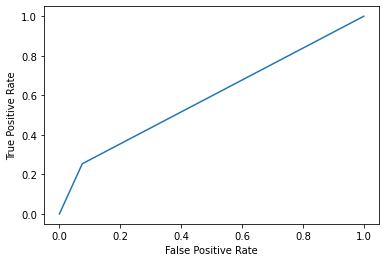

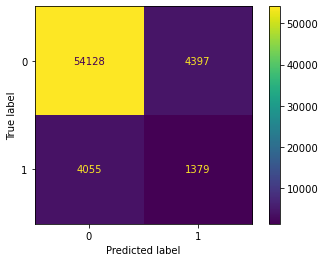

In [6]:
#decision tree classifier

#create model:
DT=model_tree = DecisionTreeClassifier(criterion="entropy")
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

#display accuracy, ROC curve and confusion matrix:
print(accuracy_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=DT.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

0.9068622086023859


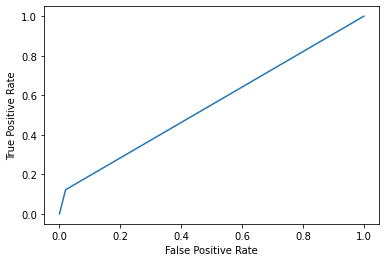

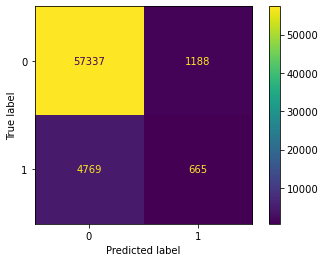

In [7]:
#random forest classifier

#create model:
RF=RandomForestClassifier(criterion="entropy")
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

#display accuracy, ROC curve and confusion matrix:
print(accuracy_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=RF.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

#### Question 3:

The overall accuracy scores of the DT and RF classifiers were 86.8% and 90.7% respectively. This was achieved through the fact that DT labelled 54,128 predictions correctly, while RF classified 57,337 correctly. DT also had more false positives than RF.

Interestingly, RF had less true negatives and more false negatives than DT, which is associated with poorer model performance. However, the difference between the true positives for DT and RF was still significantly better for RF, indicating it was the superior algorithm.

Both DT and RF are supervised classification algorithms, performing well on classification data, and are insensitive to outliers (Trehan 2020). This was observed for this dataset, as both models displayed fair accuracies. Although, there are differences between the models which ultimately led to the superiority of RF over DT. Firstly, while both models utlize a tree-structure method that splits data into branches, RF is classification algorithm that consists of multiple combined decision trees, while DT is only a single tree (Trehan 2020).

By using multiple trees, RF can avoid the issue of overfitting, which DT is susceptible to due to the presence of variance. Also, unlike RF, DT does not use averaging to build the decision trees, and therefore they may not be optimized (Trehan 2020).

For these reasons, it is common that RF will display higher accuracies than DT (Trehan 2020). However, it should be noted that RF is much slower at training than DT and can be biased when categorical variables are involved.

It should also be noted that the hyperparameters were tuned for these algorithms to try and get the best results. For example, the criterion parameter was changed from the default of "gini" to "entropy". However, this only improved the accuracies from 86.3 to 86.8% and 90.6 to 90.7%. The default values for max_depth and max_features were also used to ensure there were no limits to the number of levels or features used for the trees and to maintain consistency across both models.

#### References:

Pytlak K (2022) 'Personal Key Indicators of Heart Disease,' Kaggle, accessed 29th March 2022. https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Trehan D (2020) 'Why Random Forest and not Decision Trees, ' Towards AI,  accessed 29th March 2022. https://towardsai.net/p/machine-learning/why-choose-random-forest-and-not-decision-trees

